In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

# **Moon Plane**

## 1) Find the coefficients for the best-fit plane for the Moon in geocentric coordinates  (earth-centered).  The time-series data is at the bottom of the page.  

In [52]:
moon =  np.array([[-0.00132009, 0.00221337, 0.000168309], [-0.00176164, 0.00182271,  
0.000195791], [-0.0021079, 0.00133225, 0.000212534], [-0.00233476,  
0.000765371, 0.00021707], [-0.00242362, 0.000152656, 0.000208601],  
[-0.00236417, -0.000469603, 0.000187192], [-0.00215659, -0.0010622,  
0.000153892], [-0.00181248, -0.00158687, 0.000110707], [-0.00135405,  
-0.0020103, 0.0000604288], [-0.000811635, -0.00230738, 6.32937E-6],  
[-0.000220288, -0.00246303, -0.0000481756], [0.000383699,  
-0.00247243, -0.0000998352], [0.000965703, -0.00234012,  
-0.000145789], [0.00149483, -0.00207842, -0.000183705], [0.00194519,  
-0.00170566, -0.000211843], [0.00229655, -0.00124454, -0.000229071],  
[0.00253464, -0.000720574, -0.000234845], [0.0026511, -0.000160777,  
-0.00022918], [0.00264336, 0.000407506, -0.000212603], [0.00251429,  
0.000957655, -0.000186091], [0.00227172, 0.00146469, -0.000151015],  
[0.00192796, 0.00190605, -0.000109068], [0.00149911, 0.00226221,  
-0.0000621914], [0.00100446, 0.00251713, -0.0000125088],  
[0.000465861, 0.00265866, 0.0000377378], [-0.0000927828, 0.00267883,  
0.0000862467], [-0.000646081, 0.00257414, 0.000130712], [-0.00116766,  
0.00234599, 0.00016888], [-0.00163081, 0.00200116, 0.000198627],  
[-0.00200938, 0.00155238, 0.000218048], [-0.00227912, 0.00101895,  
0.000225599]])

moon.shape

(31, 3)

### a) Use the model z = a x + b y to fit the data to a plane using LeastSquares.

In [53]:
X = np.array([moon[:,0].copy(), moon[:,1].copy()])
y = moon[:,2].copy()
out = np.linalg.lstsq(X.T, y) # out = lstsq solution, residuals, rank, SVD of X
print(out[0])

[-0.08469606  0.02810333]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# estimated function used for future problems => cleaner code
moonf = lambda x,y: x * out[0][0] + y * out[0][1]

### b) Visualize in 3D the points for the moon position and the plane from part (a)   Qualitatively describe the fit.

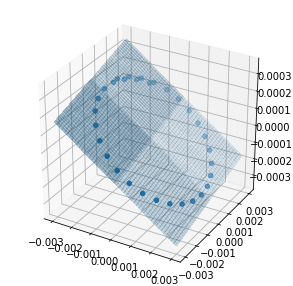

In [139]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X[0], X[1], y, marker='o')

x_randos = np.linspace(-0.003, 0.003)
y_randos = np.linspace(-0.003, 0.003)
x_randos = np.append(0,x_randos.flatten())
y_randos = np.append(0,y_randos.flatten())
x_randos,y_randos = np.meshgrid(x_randos,y_randos) 

z_randos = moonf(x_randos, y_randos)
ax.plot_surface(x_randos, y_randos, z_randos, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)
plt.show()

***Qualitative Description:*** The plane fits relatively well with respect to the points. As we can see, the plane does describe the intrinsic structure of the data as its "angle" wrt to the x-y-z axis represents the same angle held by the points, hence we can safely say this plane does fit the data relatively well.

### c) Calculate the unit normal vector to the plane from part (a)

In [56]:
pts = np.array([[1,1,moonf(1,1)], [1,2,moonf(1,2)], [2,1,moonf(2,1)]])
vec1 = pts[1] - pts[0]
vec2 = pts[2] - pts[0]
normy = np.cross(vec1,vec2)
normy /= np.linalg.norm(normy)
normy

array([-0.08436084,  0.0279921 , -0.99604201])

Hence our unit normal vector to the plane is 

$\begin{pmatrix} -0.08436084 \\ 0.0279921 \\ -0.99604201 \end{pmatrix}$

### d) Calculate the distances from the moon positions to the plane from part (a) and make a time series plot.  (The units are AU= astronomical units.)

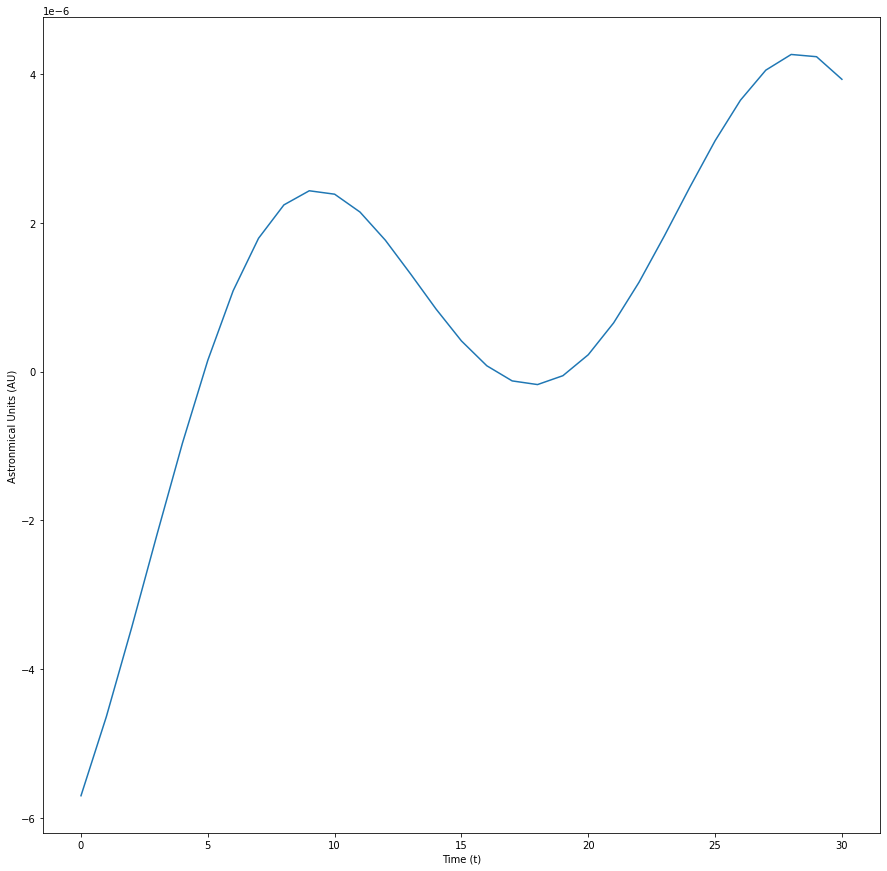

In [143]:
res = []
for vec in moon:
  pred = moonf(vec[0], vec[1])
  residu = vec[2] - pred
  res.append(residu)
plt.figure(figsize=(15,15))
plt.plot(res)
plt.ylabel('Astronmical Units (AU)')
plt.xlabel('Time (t)')
plt.show()

### e) Find another approximating plane using the model x = c y + d z and LeastSquares.   What is the distance between its unit normal vector and the unit vector calculated in part (a)?   Explain why they are so close.

In [63]:
A = np.array([moon[:,1].copy(), moon[:,2].copy()])
b = moon[:,0].copy()
solu, residu, rank, svd = np.linalg.lstsq(A.T, b) # out = lstsq solution, residuals, rank, SVD of A
# estimated function used for future problems => cleaner code
func = lambda y,z: y * solu[0] + z * solu[1]
print(solu)

[  0.3316918  -11.80357453]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
pts = np.array([[func(1,1),1,1], [func(2,1),2,1], [func(1,2),1,2]])
vec1 = pts[0] - pts[1]
vec2 = pts[2] - pts[1]
normy2 = np.cross(vec1, vec2)
normy2 /= np.linalg.norm(normy2)
print(normy2)
print(normy)

[-0.08438461  0.02798968 -0.99604007]
[-0.08436084  0.0279921  -0.99604201]


In [72]:
print(np.linalg.norm(normy2 - normy))

2.3977508760978944e-05


These vectors are extremely close because they effectively represent the same hyperplane. This is because we did not change the inherent structure of the equations from part a to part e (they both describe planes all that changes is the dependent variable), and neither did we change the inherent data on which we performed least squares to derive the equation for the plane.

Hence, since the only thing changing is our dependent variable **and** because the shape of the data is extremely circular, we basically get the same model of a plane. This results in us getting effectively the same unit norm vector.

### f) Suggest a hypothesis  for why the moon is not constrained to lie exactly within a plane.

***Hypothesis:*** The moon is not constrained to lie exactly on the plane due to varying gravitational pulls from the sun. 

Because the moon is pulled harder by the sun when the earth is in the moon's shadow vs when the moon is in earths shadow, there are going to exist certain variations off the predicted plane as the moon gets pulled harder when its closer to the sun hence deviating off the predicted plane.

# **Moon Conic Section**

## 2)  Find the coefficients for the best-fit conic section for the Moon in geocentric coordinates  (earth-centered).  The time-series data is at the bottom of the page.  

### a)  Use your answer to (1a) to make an orthonormal frame for the plane from (1a) by orthogonalizing {1, 0, a}  and {0, 1, b}

In [74]:
avec = np.array([1,0,out[0][0]])
bvec = np.array([0,1,out[0][1]])
v1 = avec.copy()
v2 = bvec - (avec.dot(bvec))/(avec.dot(avec)) * avec
ortho_frame = np.array([v1,v2])
print(ortho_frame.T)

[[ 1.          0.00236329]
 [ 0.          1.        ]
 [-0.08469606  0.02790317]]


### b)  Use the frame from (2a) to project the moon positions onto  2D  and make a scatter plot of the points.

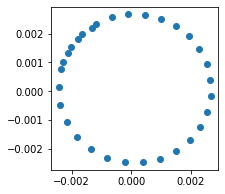

In [146]:
pts2b = []
for v in moon:
  result = ortho_frame.dot(v)
  pts2b.append(result)
pts2b = np.array(pts2b)
plt.figure(figsize=(3,3))
plt.scatter(pts2b[:,0], pts2b[:,1])
plt.show()

### c)  Use the model  x^2 = a x y + b y^2 + c x + d y + e with LeastSquares and write the equation for the conic section that best fits the data.

In [97]:
aug_moon = moon.copy()
aug_moon = pd.DataFrame(aug_moon)
aug_moon.columns = ['x', 'y', 'z']
aug_moon.head()

,x,y,z
0,-0.001320,0.002213,0.000168
1,-0.001762,0.001823,0.000196
2,-0.002108,0.001332,0.000213
3,-0.002335,0.000765,0.000217
4,-0.002424,0.000153,0.000209


In [98]:
aug_moon.drop('z', axis=1, inplace=True)
aug_moon['x^2'] = aug_moon['x'] ** 2
aug_moon['xy'] = aug_moon['x'] * aug_moon['y']
aug_moon['y^2'] = aug_moon['y'] ** 2
aug_moon['bias'] = 1
aug_moon.head()

,x,y,x^2,xy,y^2,bias
0,-0.001320,0.002213,0.000002,-2.921848e-06,4.899007e-06,1
1,-0.001762,0.001823,0.000003,-3.210959e-06,3.322272e-06,1
2,-0.002108,0.001332,0.000004,-2.808250e-06,1.774890e-06,1
3,-0.002335,0.000765,0.000005,-1.786958e-06,5.857928e-07,1
4,-0.002424,0.000153,0.000006,-3.699801e-07,2.330385e-08,1


In [100]:
newmoon = aug_moon.to_numpy()
A = np.array([newmoon[:,3], newmoon[:,4], newmoon[:,0], newmoon[:,1], 
              newmoon[:,5]]) # xy, y^2, x, y, bias
b = newmoon[:,2]
solv, _, _, _ = np.linalg.lstsq(A.T, b)
print(solv)

[-5.65466988e-03 -9.68275610e-01  2.33839857e-04  1.90589671e-04
  6.45214209e-06]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


Hence **the conic equation** that best fits the data is:

$x^2 = -0.00565466988 * xy + -0.96827561 * y^2 + 0.000233839857 * x + 0.000190589671 * y + 0.00000645214209$

### d)  Plot the conic with the projected data points in 2D.  Do you see any discrepancies? 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


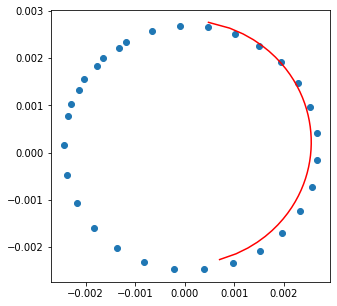

In [147]:
# x_pred = np.sqrt(solv[0] * A[0] + solv[1] * A[1] + solv[2] * A[2] + 
#                  solv[3] * A[3] + solv[4] + A[4])
func2d = lambda x,y: np.sqrt(solv[0] * x * y + solv[1] * y**2 + solv[2] * x + 
                             solv[3] * y + solv[4])
xt = np.linspace(-0.003, 0.003)
yt = np.linspace(-0.003, 0.003)
xpred = func2d(xt,yt)
plt.figure(figsize=(5,5))
plt.plot(xpred, yt, color='red')
plt.scatter(pts2b[:,0], pts2b[:,1])
plt.show()

We do see discrepancies on the portion of the graph we do plot betweeen the predicted line and the actual points. 

The predicted line seems to be up-shifted by a little bit as compared to the actual points leading to certain deviations, as we see near the bottom of the graph, being relatively large.

# **Stock prices**

## 3)  The daily values of 3 stocks are given below.  The goal is to be able to predict one of the stock values.

{{2.34, 2.43, 2.36, 2.31, 2.26, 2.38, 2.37, 2.44},

{0.240691, 0.242224, 0.243758, 0.234559, 0.246824, 0.252956, 0.24989,   0.260621},

{24.8325, 25.069, 25.542, 24.8325, 22.231, 22.9405,   22.231, 22.9405}}



In [105]:
verastem = np.array([2.34, 2.43, 2.36, 2.31, 2.26, 2.38, 2.37, 2.44])
xin = np.array([0.240691, 0.242224, 0.243758, 0.234559, 0.246824, 0.252956, 
                0.24989, 0.260621])
morpho = np.array([24.8325, 25.069, 25.542, 24.8325, 22.231, 22.9405,   22.231, 
                   22.9405])

### a)  Pick one of the three to be stock X and the other two to be Y and Z.

MorphoSys AG = stock X while 

Verstaem = stock Y 

Xin Jiang ... = stock Z

### b)  Manipulate the lists to create triples of the form {X[today], Y[yesterday], Z[yesterday]} and then make the matrix A and vector b for least squares

In [106]:
arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], verastem[i-1], xin[i-1]])
arstock = np.array(arstock)
arstock

array([[25.069   ,  2.34    ,  0.240691],
       [25.542   ,  2.43    ,  0.242224],
       [24.8325  ,  2.36    ,  0.243758],
       [22.231   ,  2.31    ,  0.234559],
       [22.9405  ,  2.26    ,  0.246824],
       [22.231   ,  2.38    ,  0.252956],
       [22.9405  ,  2.37    ,  0.24989 ]])

In [108]:
A = np.array([arstock[:,1].copy(), arstock[:,2].copy()])
b = arstock[:,0].copy()
print(A.T)
print(b)

[[2.34     0.240691]
 [2.43     0.242224]
 [2.36     0.243758]
 [2.31     0.234559]
 [2.26     0.246824]
 [2.38     0.252956]
 [2.37     0.24989 ]]
[25.069  25.542  24.8325 22.231  22.9405 22.231  22.9405]


### c)  Use least squares to create a model for X[n] = a Y[n-1] + b Z[n-1] with the data from (3b) 

In [111]:
md, _, _ ,_ = np.linalg.lstsq(A.T, b)
print(md)

[ 16.84753347 -65.10015635]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


#### c1)  Explain why the X,Y,Z values are not on the same day, and why the X values are on the day after the Y and Z values. 

Because we are trying to predict stock X, what we effectively want to do is to use today's stock prices for Y & Z and predict what the price of stock X will be tomorrow so we can make profits. 

Thereby, we need to use a lag to be able to build a model that takes in today's closing price for Y & Z and predicts what X's closing price will be for tomorrow. If we used no lag, then we would not be able to predict any kind of future stock price for X as our relationships will be based, for day n, between Y's closing price & Z's closing price and X's closing price. Hence to build a model that predicts tomorrows stock price, we need a lag.

### d)  What is the mean-squared error for the model in (3c)?

In [112]:
preds = []
for vec in A.T:
  result = vec.dot(md)
  preds.append(result)
sum = 0
for i in range(len(preds)):
  sum += (b[i] - preds[i]) ** 2
sum /= len(preds)
print('MSE: {}'.format(sum))

MSE: 1.1580068524268938


### e)  Repeat steps a-d for another choice of X among the three stocks.   Explain why it is not fair to compare the errors from part d.  Choose a rescaling which you think makes a fair comparison.

In [113]:
arstock = []
for i in range(1, len(morpho)):
  arstock.append([verastem[i], morpho[i-1], xin[i-1]])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy()])
b = arstock[:,0].copy()
md, _, _ ,_ = np.linalg.lstsq(A.T, b)
preds = []
for vec in A.T:
  result = vec.dot(md)
  preds.append(result)
sum = 0
for i in range(len(preds)):
  sum += (b[i] - preds[i]) ** 2
sum /= len(preds)
print('MSE: {}'.format(sum))

MSE: 0.002620463174575019


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


It is not fair to compare our MSE here vs the MSE from part d because the data does not have some intrinsic well defined structure from which if we changed our dependent variable, we would derive a similar Least Squares solution as we had done in **Problem 1**. 

In **Problem 1** we had a well defined structure of the data as it was heavily circular. Here however, we do not have a well defined structure of our data and hence changing the dependent variable will lead to a far different model as compared to before.

Hence, it is not fair to compare the MSE values from part e and d because they represent 2 different models for 2 different dependent variables, and hence are not very "comparable" as their errs are not representative of the same intrinsic data.

### f)  Use least squares to make a quadratic fit for X[n] = a Y[n-1] + b Z[n-1] + c Y[n-1]2 +d Y[n-1] * Z[n-1] + e Z[n-1]2   with the data from (3b) 

In [149]:
arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], verastem[i-1], xin[i-1], verastem[i-1] ** 2, 
                  verastem[i-1] * xin[i-1], xin[i-1] ** 2])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy(), arstock[:,3].copy(), 
              arstock[:,4].copy(), arstock[:,5].copy()])
b = arstock[:,0].copy()
md, _, _ ,_ = np.linalg.lstsq(A.T, b)
print(md)

[ -1405.92528915  13709.19007014     83.57544471   4194.40054995
 -48422.91276492]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


#### f1)  Make a 3D plot of the quadratic function a y + b z + c y2 + d y z + e z2

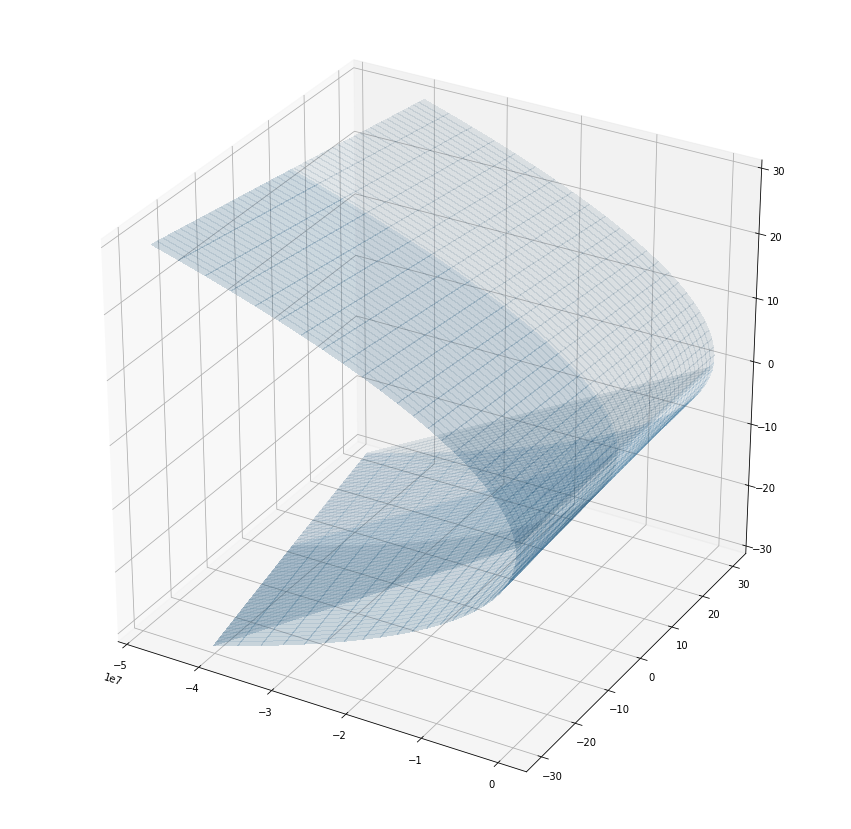

In [151]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
z_randos = np.linspace(-30, 30)
y_randos = np.linspace(-30, 30)
z_randos = np.append(0,z_randos.flatten())
y_randos = np.append(0,y_randos.flatten())
z_randos,y_randos = np.meshgrid(z_randos,y_randos) 

x = md[0] * y_randos + md[1] * z_randos + md[2] * y_randos ** 2 + md[3] * y_randos * z_randos + md[4] * z_randos ** 2
ax.plot_surface(x, y_randos, z_randos, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)
plt.show()

### g)  Choose two functions f and g from this list  { Sin[12x], Cos[12x], Log[x], Round[12x], or functions of your choice} to make a fit for X[n] = f(Y[n-1]) + g(Z[n-1])  



In [124]:
arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], np.cos(12 * verastem[i-1]), np.sin(12 * xin[i-1])])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy()])
b = arstock[:,0].copy()
md, _, _ ,_ = np.linalg.lstsq(A.T, b)
print(md)

[-15.97875964  46.48537407]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


### h)  Compute the mean-squared errors for (3f) and (3g).   Make a scatter plot for the actual values of X versus the predictions  (ideally the three sets of predictions will be different colors)  Compare the three models using the errors from c,f,g   Are any of them good models?  Might one of them be an over-fit model?

In [135]:
arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], verastem[i-1], xin[i-1], verastem[i-1] ** 2, 
                  verastem[i-1] * xin[i-1], xin[i-1] ** 2])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy(), arstock[:,3].copy(), 
              arstock[:,4].copy(), arstock[:,5].copy()])
b1 = arstock[:,0].copy()
md1, _, _ ,_ = np.linalg.lstsq(A.T, b1)
preds1 = []
for vec in A.T:
  result = vec.dot(md1)
  preds1.append(result)
sum = 0
for i in range(len(preds1)):
  sum += (b1[i] - preds1[i]) ** 2
sum /= len(preds)
print('--------------------------------------')
print('MSE for 3f: {}'.format(sum))


arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], np.cos(12 * verastem[i-1]), np.sin(12 * xin[i-1])])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy()])
b2 = arstock[:,0].copy()
md2, _, _ ,_ = np.linalg.lstsq(A.T, b2)
preds2 = []
for vec in A.T:
  result = vec.dot(md2)
  preds2.append(result)
sum = 0
for i in range(len(preds2)):
  sum += (b2[i] - preds2[i]) ** 2
sum /= len(preds2)
print('MSE for 3g: {}'.format(sum))
print('--------------------------------------')
print('--------------------------------------')

--------------------------------------
MSE for 3f: 0.10772487027979098
MSE for 3g: 19.713566279325647
--------------------------------------
--------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [127]:
# Recalculating b
arstock = []
for i in range(1, len(morpho)):
  arstock.append([morpho[i], verastem[i-1], xin[i-1]])
arstock = np.array(arstock)
A = np.array([arstock[:,1].copy(), arstock[:,2].copy()])
b = arstock[:,0].copy()
md, _, _ ,_ = np.linalg.lstsq(A.T, b)
preds = []
for vec in A.T:
  result = vec.dot(md)
  preds.append(result)
sum = 0
for i in range(len(preds)):
  sum += (b[i] - preds[i]) ** 2
sum /= len(preds)
print('MSE: {}'.format(sum))

MSE: 1.1580068524268938


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [128]:
# ensuring we are synced up in terms of predictions etc.
print(preds)
print(preds1)
print(preds2)
print(b)
print(b1)
print(b2)

[23.754206591122767, 25.17068606385615, 23.891495081027525, 23.647974745713416, 22.00714465453439, 23.62965451235942, 23.66077625701117]
[24.552830483678008, 25.55161852673882, 24.94015629230853, 22.422729326278386, 22.940924907406952, 21.877324531760678, 23.50095880946992]
[27.32724879088652, 20.930423978571113, 25.947596100537197, 28.51214499875815, 14.772601427277685, 20.255011393328253, 22.38074730863741]
[25.069  25.542  24.8325 22.231  22.9405 22.231  22.9405]
[25.069  25.542  24.8325 22.231  22.9405 22.231  22.9405]
[25.069  25.542  24.8325 22.231  22.9405 22.231  22.9405]


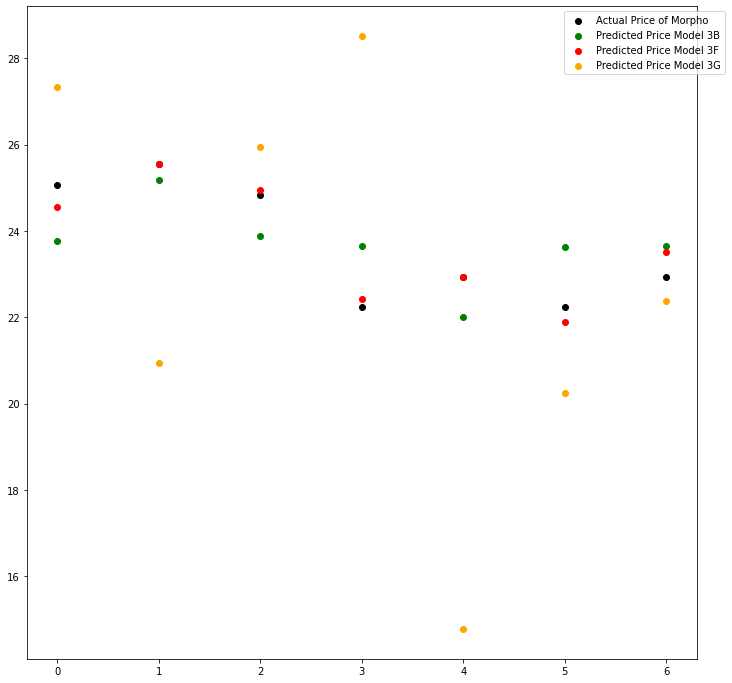

In [136]:
plt.figure(figsize=(12,12))
plt.scatter(list(range(7)),b, color='black', label='Actual Price of Morpho')
plt.scatter(list(range(7)),preds, color='green', label='Predicted Price Model 3B')
plt.scatter(list(range(7)),preds1, color='red', label='Predicted Price Model 3F')
plt.scatter(list(range(7)),preds2, color='orange', label='Predicted Price Model 3G')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

**Model 3G** does not seem to be a good model.

**Model 3F** seems to be a great model.

**Model 3C** seems to be a decent model.

This comparision done purely on the MSE of each model.

**Model 3F** is without doubt overfitting. We can see this on the graph where the points from the model are extremely close to and sometimes overlapping/on top of the actual points. We can also observe this via the MSE which is extremely low.
